In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # scaling transform
from sklearn.metrics import accuracy_score, zero_one_loss
import warnings
warnings.filterwarnings("ignore")


# EXPLORATION

In [55]:
tr = pd.read_csv("./train.csv")
val_X = pd.read_csv("./test.csv")
val_Y = pd.read_csv("./test_labels.csv")



In [56]:
tr['comment_text'][0] # shows an example of a possible text in the training dataset

"Explanation\r\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [57]:
lens = tr.comment_text.str.len()
lens.mean(), lens.std(), lens.max()

(396.5939613087591, 594.3878690070298, 5000)

<Axes: >

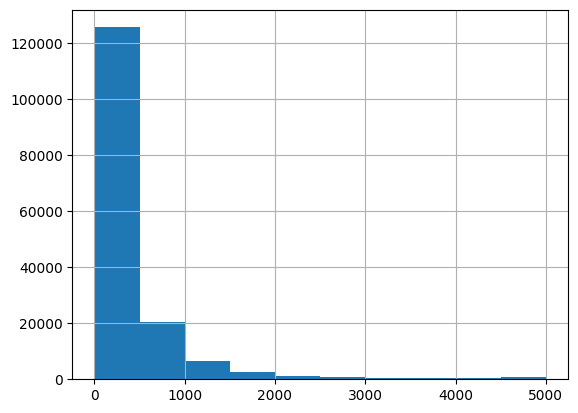

In [58]:
lens.hist()

In [59]:
x=tr.iloc[:,2:].sum() #grabs the sum of all the 'tags' and values that equal 1 for any of the toxicity classes
#marking comments without any tags as "clean"
x.index
rowsums=tr.iloc[:,2:].sum(axis=1) 
tr['noclass']=(rowsums==0) #labels the rows with all '0' for the toxicity as clean
#count number of clean entries
tr['noclass'].sum()
print("Total comments = ",len(tr))
print("Total comments with no classes = ",tr['noclass'].sum())
print("Total tags =",x.sum())

Total comments =  159571
Total comments with no classes =  143346
Total tags = 35098


total number of occurances for toxic: 15294
total number of occurances for severe_toxic: 1595
total number of occurances for obscene: 8449
total number of occurances for threat: 478
total number of occurances for insult: 7877
total number of occurances for identity_hate: 1405
total number of occurances for noclass: 143346


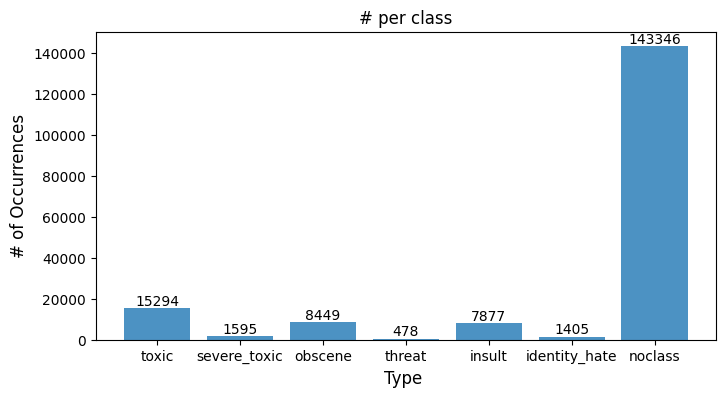

In [60]:
x=tr.iloc[:,2:].sum()
#plot
plt.figure(figsize=(8,4))
ax= plt.bar(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
l = []
i =0
for rect, label in zip(rects, labels):
    height = rect.get_height()
    print(f'total number of occurances for {x.index[i]}: {height}')
    l.append(height)
    i+= 1

plt.bar_label(ax, labels=l)

plt.show()

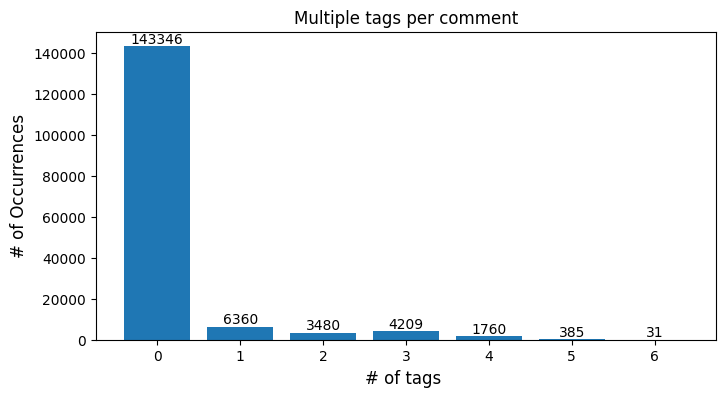

In [61]:
x=rowsums.value_counts()

#plot
plt.figure(figsize=(8,4))
ax = plt.bar(x.index, x.values)
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
l = []
for rect, label in zip(rects, labels):
    height = rect.get_height()
    l.append(height)
    
plt.bar_label(ax, labels=l)

plt.show()

In [62]:
print("invalid rows:", len(val_Y[val_Y["toxic"] == -1]))
print("total rows:", len(val_Y))

invalid rows: 89186
total rows: 153164


In [63]:
feature_column = val_Y.iloc[:, 1]
val_X = val_X[feature_column != -1]
val_Y = val_Y[feature_column != -1]

In [31]:
#explain that we visualized our data and at first glance we saw that there is a lot of clean data (data representation)

In [32]:
#discuss the graph and explain how a comment can have  multiple tags and different types of toxicity 

In [33]:
#show the number of unique words over total words (illustrate the point that the bag of words will be sparse)

In [64]:
 import re, string

 def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"'s", " ", text)
    text = re.sub(r"'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"'re", " are ", text)
    text = re.sub(r"'d", " would ", text)
    text = re.sub(r"'ll", " will ", text)
    text = re.sub(r"'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text.split()


In [65]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=clean_text, strip_accents='unicode')
tr_term_document_matrix = vectorizer.fit_transform(tr["comment_text"])
val_term_document_matrix = vectorizer.transform(val_X["comment_text"])

In [67]:
from sklearn.linear_model import LogisticRegression
classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train_predictions = np.zeros((len(tr), len(classes)))
val_predictions = np.zeros((len(val_X), len(classes)))
for i, c in enumerate(classes):
    model = LogisticRegression().fit(tr_term_document_matrix, tr[c])
    train_predictions[:, i] = model.predict(tr_term_document_matrix)
    val_predictions[:, i] = model.predict(val_term_document_matrix)
    print("training error for " + c + ":", zero_one_loss(tr[c], train_predictions[:, i]))
    print("validation error for " + c + ":", zero_one_loss(val_Y[c], val_predictions[:, i]))

training error for toxic: 0.029265969380401158
validation error for toxic: 0.07602613398355684
training error for severe_toxic: 0.008002707258837782
validation error for severe_toxic: 0.006861733720966545
training error for obscene: 0.018017058237399075
validation error for obscene: 0.04021694957641686
training error for threat: 0.0018612404509591451
validation error for threat: 0.004626590390446661
training error for insult: 0.02633310563949587
validation error for insult: 0.04163931351402039
training error for identity_hate: 0.007068953631925612
validation error for identity_hate: 0.011879083434930715


In [72]:
print(val_predictions[val_predictions[:, 0] == 1])
print(val_Y[val_predictions[:, 0] == 1])

[[1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0.]]
                      id  toxic  severe_toxic  obscene  threat  insult  \
38      001068b809feee6b      0             0        0       0       0   
48      0013fed3aeae76b7      1             0        1       0       1   
56      0016b94c8b20ffa6      0             0        0       0       0   
59      0017d4d47894af05      1             0        1       0       1   
81      001eff4007dbb65b      1             0        1       0       1   
...                  ...    ...           ...      ...     ...     ...   
153109  ffe8c913b22202fc      0             0        0       0       0   
153115  ffeaf5179971287c      0             0        0       0       0   
153149  fff8f521a7dbcd47      0             0        0       0       0   
153151  fff9d70fe0722906      0             0        0       0       0   
153155  fffac2a094c8e0e2      1             0        1